# San Francisco Crime Analysis 

## Summer of 2014

This entry is a graphical analysis of San Francisco crimes in the summer of 2014

In [2]:
data.sanfranFull <- read.csv(file="sanfrancisco_incidents_summer_2014.csv",head=TRUE,sep=",")
data.sanfran <- data.sanfranFull [ -c(1, 8:9,13) ]
data.sanfran$Category <- as.factor(data.sanfran$Category) 
summary(data.sanfran)

           Category                            Descript         DayOfWeek   
 LARCENY/THEFT :9466   GRAND THEFT FROM LOCKED AUTO: 3766   Friday   :4451  
 OTHER OFFENSES:3567   STOLEN AUTOMOBILE           : 1350   Monday   :4005  
 NON-CRIMINAL  :3023   LOST PROPERTY               : 1202   Saturday :4319  
 ASSAULT       :2882   PETTY THEFT OF PROPERTY     : 1125   Sunday   :4218  
 VEHICLE THEFT :1966   WARRANT ARREST              :  980   Thursday :3968  
 WARRANTS      :1782   PETTY THEFT FROM LOCKED AUTO:  955   Tuesday  :3930  
 (Other)       :6307   (Other)                     :19615   Wednesday:4102  
         Date            Time           PdDistrict         X         
 06/28/2014:  410   12:00  :  784   SOUTHERN :5739   Min.   :-122.5  
 08/09/2014:  410   00:01  :  661   MISSION  :3700   1st Qu.:-122.4  
 08/08/2014:  403   18:00  :  649   NORTHERN :3589   Median :-122.4  
 06/29/2014:  397   19:00  :  621   CENTRAL  :3513   Mean   :-122.4  
 08/29/2014:  388   17:00  :  594 

In [3]:
#group crime categories more

theft <- c('LARCENY/THEFT','BURGLARY','VEHICLE THEFT', 'STOLEN PROPERTY', 'ROBBERY')
moneycrimes <- c('BRIBERY','FRAUD','EMBEZZLEMENT','EXTORTION','FORGERY/COUNTERFEITING')
illegalvicessubstances <- c('PROSTITUTION','PORNOGRAPHY/OBSCENE MAT', 'GAMBLING','DRUG/NARCOTIC','DRIVING UNDER THE INFLUENCE', 'LIQUOR LAWS')
publicdisturbancesuspiciousbehavior <- c('DISORDERLY CONDUCT','DRUNKENNESS','TRESPASSING', 'TRESPASS','LOITERING', 'SUSPICIOUS OCC')
minorpropertycrimes <- c('VANDALISM') #just leave these as is for now
lostpeople <- c('MISSING PERSON','KIDNAPPING', 'RUNAWAY', 'SUICIDE')
misc <- c('OTHER OFFENSES','NON-CRIMINAL', 'SECONDARY CODES')
legalpermissiondocs <- c('WARRANTS')
domestic <- c('FAMILY OFFENSES') #just leave these as is for now
fire <- c('ARSON') #just leave these as is for now
abuse <- c('ASSAULT') #just leave these as is for now
weapons <- c('WEAPON LAWS') #just leave these as is for now

data.sanfran$SimpleCat <- '' 

data.sanfran[data.sanfran$Category %in% theft,]$SimpleCat <- 'Theft'       
data.sanfran[data.sanfran$Category %in% moneycrimes, ]$SimpleCat <- 'Fraud and Money Crimes'      
data.sanfran[data.sanfran$Category %in% illegalvicessubstances, ]$SimpleCat <- 'Vices and Substances'    
data.sanfran[data.sanfran$Category %in% publicdisturbancesuspiciousbehavior , ]$SimpleCat <- 'Disturbance and Suspicious Activity'  
data.sanfran[data.sanfran$Category %in% lostpeople, ]$SimpleCat <- 'Missing People'   
data.sanfran[data.sanfran$Category %in% misc, ]$SimpleCat <- 'Misc.'  
data.sanfran[data.sanfran$Category %in% legalpermissiondocs, ]$SimpleCat <- 'Warrants'
data.sanfran[data.sanfran$Category %in% minorpropertycrimes , ]$SimpleCat <- 'Vandalism'
data.sanfran[data.sanfran$Category %in% domestic , ]$SimpleCat <- 'Family Offenses'
data.sanfran[data.sanfran$Category %in% fire , ]$SimpleCat <- 'Arson'
data.sanfran[data.sanfran$Category %in% abuse , ]$SimpleCat <- 'Assault'
data.sanfran[data.sanfran$Category %in% weapons , ]$SimpleCat <- 'Weapons'


data.sanfran$SimpleCat <- as.factor(data.sanfran$SimpleCat)
#leave out misc and warrants - focus more on the actual illegal crimes
data.sanfran.majorcrimes <- data.sanfran[!(data.sanfran$Category %in% misc | data.sanfran$Category %in% legalpermissiondocs | data.sanfran$Category %in% minorpropertycrimes) ,]
summary(data.sanfran.majorcrimes[ -c(3:5,7:9) ])

           Category                              Descript         PdDistrict  
 LARCENY/THEFT :9466   GRAND THEFT FROM LOCKED AUTO  : 3766   SOUTHERN :4159  
 ASSAULT       :2882   STOLEN AUTOMOBILE             : 1350   NORTHERN :2611  
 VEHICLE THEFT :1966   PETTY THEFT OF PROPERTY       : 1125   CENTRAL  :2563  
 DRUG/NARCOTIC :1345   PETTY THEFT FROM LOCKED AUTO  :  955   MISSION  :2494  
 SUSPICIOUS OCC:1300   BATTERY                       :  903   BAYVIEW  :1757  
 MISSING PERSON:1266   GRAND THEFT FROM UNLOCKED AUTO:  681   INGLESIDE:1683  
 (Other)       :1937   (Other)                       :11382   (Other)  :4895  
                               SimpleCat    
 Theft                              :11754  
 Assault                            : 2882  
 Disturbance and Suspicious Activity: 1762  
 Vices and Substances               : 1601  
 Missing People                     : 1458  
 Weapons                            :  354  
 (Other)                            :  351  

OGR data source with driver: ESRI Shapefile 
Source: "sfpd_districts", layer: "sfpd_districts"
with 10 features
It has 3 fields


Regions defined for each Polygons
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=San+Francisco&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false


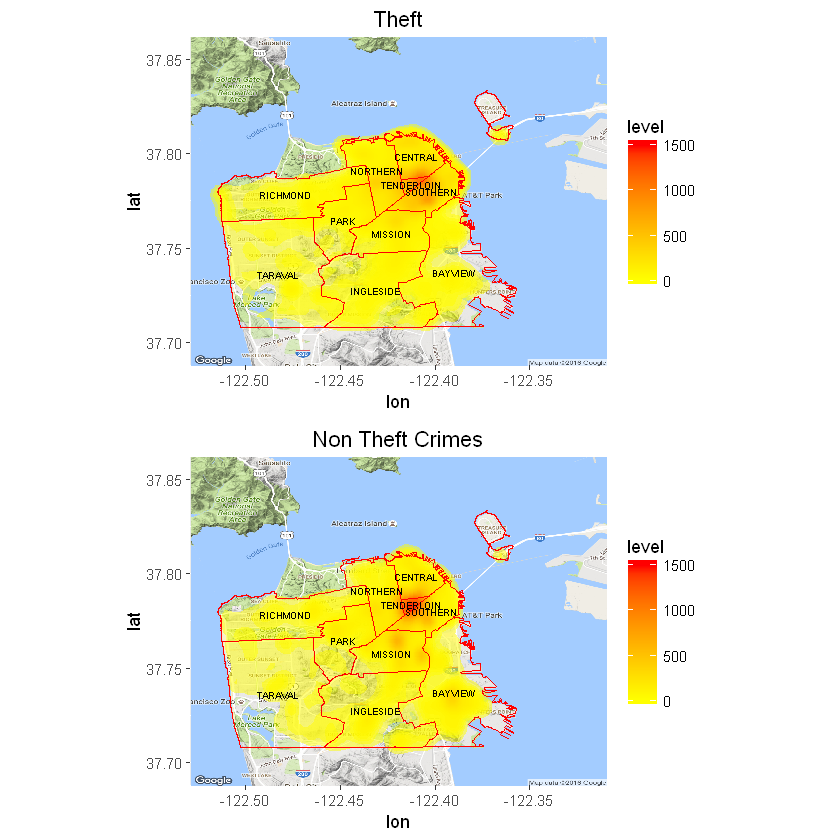

In [14]:
#mapping the points of the general crime categories on a map of san francisco
#downloaded the shapefile of san francisco from their site
#https://catalog.data.gov/organization/e370c484-cc05-4509-919a-5600f8d56a48?q=san+francisco+police+departments&sort=none&harvest_source_title=SFO+JSON&res_format=ZIP&dataset_type=dataset


#The Coordinate reference system for GoogleEarth is WGS84 Decimal Degrees
#ESRI GCS_WGS_1984 
#to get coordinates is same format - decimal degress

require(rgdal)
require(sp)
require(ggplot2)
require(ggmap)
require(maps)
require(gridExtra)


WGS84<-CRS("+proj=longlat +datum=WGS84") 

#read shapefile and get coordinates in correct format

NeighborhoodsSF.poly <- readOGR(dsn="sfpd_districts", layer='sfpd_districts')
NeighborhoodsSF <- spTransform(NeighborhoodsSF.poly , CRS("+proj=longlat +datum=WGS84"))
NeighborhoodsSF.f  <- fortify(NeighborhoodsSF)    # format shapefile to be ploted
NeighborhoodsSF$id <- row.names(NeighborhoodsSF)
NeighborhoodsSF.f  <- merge(NeighborhoodsSF.f, NeighborhoodsSF@data, by="id")


idList <- unique(NeighborhoodsSF$DISTRICT)
centroids.df <- as.data.frame(coordinates(NeighborhoodsSF))
names(centroids.df) <- c("Longitude", "Latitude")
pop.df <- data.frame(id = idList,centroids.df)

#now on a google map with spacialpointsDF
SanFran <- get_map("San Francisco",zoom = 12,maptype='terrain')
SanFranMap <- ggmap(SanFran)+ coord_equal()

districtpoly <- geom_polygon(data=NeighborhoodsSF.f,aes(x=long, y=lat, group=group),color='red', fill='NA')

districtname <- geom_text(data=pop.df, aes(label = id, x = Longitude, y = Latitude), size=2, color='black') 
  				
levelgradient <- scale_fill_gradient(low = "yellow", high = "red", limits=c(0,1500))

#get 4 focues categories mapped to san francisco map to get an idea of where the crimes are taking place
theftmap <- 		SanFranMap + 
				stat_density2d(aes(x = X, y = Y, fill=..level..), bins=100,geom="polygon", alpha = 0.5,
					data = data.sanfran[data.sanfran$SimpleCat =='Theft',])+ 
				ggtitle("Theft")+
				levelgradient+
				districtpoly+
				districtname  


nontheftmap <- 		SanFranMap + 
				stat_density2d(aes(x = X, y = Y, fill=..level..), bins=100,geom="polygon", alpha = 0.5,
					data = data.sanfran[data.sanfran$SimpleCat !='Theft',])+ 
				ggtitle("Non Theft Crimes")+
				levelgradient+
				districtpoly+
				districtname  






grid.arrange(theftmap,nontheftmap , ncol=1)

In order to simplify the density graph i first categorized the crime categories further into fewer, simpler categories. All incidents related to Theft ('LARCENY/THEFT','BURGLARY','VEHICLE THEFT', 'STOLEN PROPERTY', 'ROBBERY') were all lumped into 1 category. Above in the code the rest of the groupings can be found.
These density maps show 2 aspects. The above map is a density map of all theft related crimes. The lower is a density map of all other crime categories combined. 
As can be seen in these density maps; the level of theft crimes is nearly just as high as the total of every other catogory crime summed together. This can be seen by the fact that the density level in each specific district is about the same in each graph. For example Bayview is in the range of 0-500 for both theft crimes and all non-theft crimes. Theft Crimes are only slightly lower in frequency. Both Theft and Non-Theft (ie all other crime) crimes are peaking in the Tenderloin and Southern Police Districts, wich can be seen by the red color in these districts.

Warning message:
"Using size for a discrete variable is not advised."

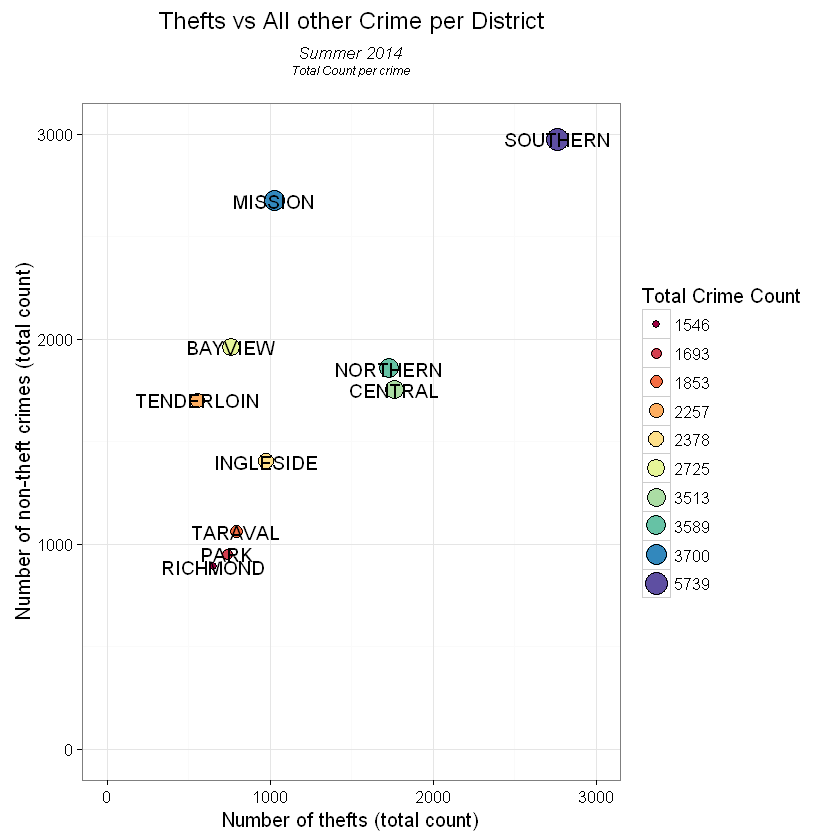

In [15]:
CountCatPerDistrict <- table ( data.sanfran$PdDistrict,data.sanfran$SimpleCat)

TotalDistrictCrime <- as.data.frame.matrix(addmargins(CountCatPerDistrict , FUN = list(Total = sum), quiet = TRUE))
TotalDistrictCrime <- setNames(cbind(rownames(TotalDistrictCrime ), TotalDistrictCrime , row.names = NULL), 
         c("District",colnames(TotalDistrictCrime )))


#TotalDistrictCrime$District <- as.factor(TotalDistrictCrime$District)
TotalDistrictCrime$TotalOther <- TotalDistrictCrime$Total - TotalDistrictCrime$Theft
TotalDistrictCrime$TotalNonDrugs <- TotalDistrictCrime$Total - TotalDistrictCrime$'Vices and Substances'


TotalDistrictCrimeSmall <- TotalDistrictCrime[TotalDistrictCrime$District!='Total',]
radius <- as.factor(TotalDistrictCrimeSmall$Total)
ggplot(TotalDistrictCrimeSmall , aes(x=Theft, y=TotalOther, label=TotalDistrictCrimeSmall$District))+
  geom_point(aes(size=radius , fill = radius), shape=21)+
  xlab("Number of thefts (total count)") +
  ylab("Number of non-theft crimes (total count)") +
  geom_text(size=4)+
  xlim(c(0, 3000)) + 
  ylim(c(0, 3000))+ 
  guides(fill = guide_legend(title="Total Crime Count"), size = guide_legend(title="Total Crime Count"))+ 
  theme_bw()+ 
  ggtitle(expression(atop("Thefts vs All other Crime per District", atop(italic("Summer 2014"), atop(italic("Total Count per crime"),""))) ))+ 
  scale_fill_brewer(palette="Spectral")



This bubble plot confirms the idea that in most districts the number of theft crimes are almost as many as the total of all other crimes in that district. It also confirms that the Southern District sees the most crimes of all the districts, which could be seen in the density graphs as well. If you look at the southern district, it has a total of 5739 reported crimes - these are almost perfectly split 50/50 between theft and non-theft. This goes to show Theft is the most significant problem in San Francisco. Now I will investigate further what exact theft crimes were more prevalent. I will focus on the Southern District for this because this has the highest crime rate. 

Loading required package: chron


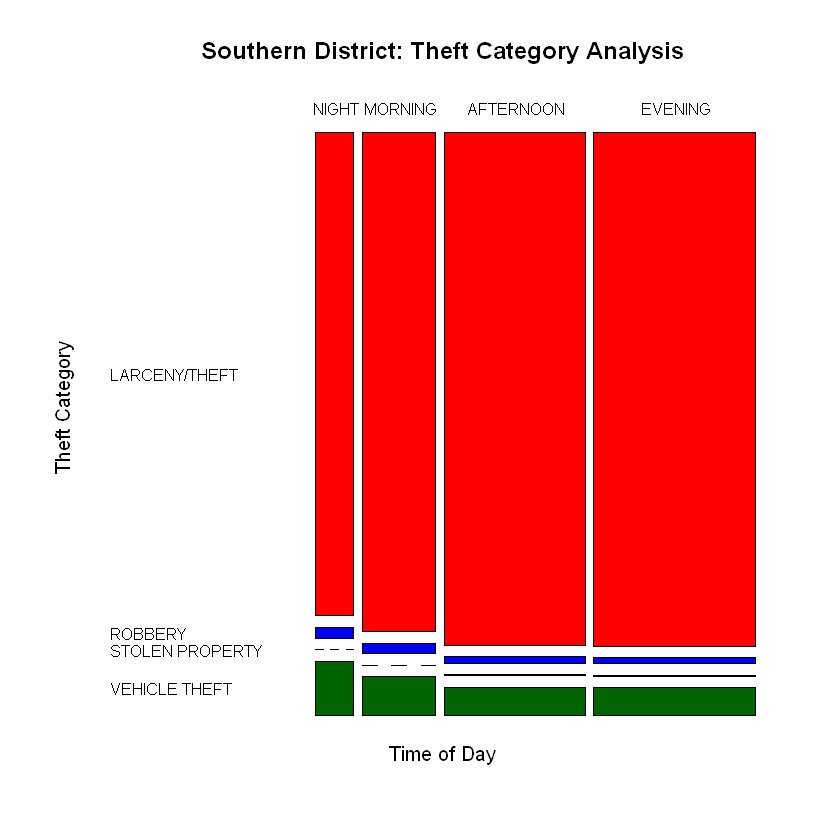

In [17]:

require(chron)

data.sanfran$Time <- times(paste0(data.sanfran$Time, ":00")) # append a chron "times" class column
breaks <- c(0, 6, 12, 18, 24) / 24 # times are internally fractions of a day
labels <- c(" NIGHT"," MORNING", " AFTERNOON", " EVENING")
data.sanfran$TimeInterval<- cut(data.sanfran$Time, breaks, labels, include.lowest = TRUE)

southerndistrictthefts <- data.sanfran[data.sanfran$SimpleCat=='Theft' & data.sanfran$PdDistrict=='SOUTHERN',]
southerndistricttheftsCOMPACT <- droplevels(southerndistrictthefts) #drop all levels where count is zero

#make a mosaic of theft type

mosaicplot(table(southerndistricttheftsCOMPACT$TimeInterval, southerndistricttheftsCOMPACT$Category), 
        main="Southern District: Theft Category Analysis",xlab="Time of Day",ylab="Theft Category",cex.axis=.8,color=c("red","blue", "black","dark green","brown","white","blue"), las=1) 




This mosaic plot shows that of the almost 3000 cases of theft in the Southern Police District, the largest part were due to Larceny/Theft in the afternoon or evening. 